In [224]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [123]:
import chardet
with open('dataset.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [134]:
dados = pd.read_csv('dataset.csv',encoding='ISO-8859-1')
dados.head()

,Rank in 2022,Country,2000,2007,2014,2022,Absolute change,Percent change
0,1,Belarus,5.0,5.0,5.0,5.0,0.0,0.0
1,1,Bosnia and Herzegovina,9.3,6.6,5.0,5.0,0.0,0.0
2,1,Chile,5.0,5.0,5.0,5.0,0.0,0.0
3,1,China,13.3,7.8,5.0,5.0,0.0,0.0
4,1,Croatia,5.0,5.0,5.0,5.0,0.0,0.0


In [155]:
dados = pd.DataFrame(dados)
datatypes_per_column = {
       "Rank in 2022": "int",
       "Country": "string",
       "2000": "float",
       "2007": "float",
       "2014": "float",
       "2022": "float",
       "Absolute change": "float",
       "Percent change": "float",

       }
  
dados = dados.astype(datatypes_per_column)


In [142]:
(dados.replace('<5','5'))
#Os valores de '<5' foram assumidos como '5' para melhor aplicabilidade dos parâmetros.

,Rank in 2022,Country,2000,2007,2014,2022,Absolute change,Percent change
0,1.0,Belarus,5.0,5.0,5.0,5.000,0.0,0.0
1,1.0,Bosnia and Herzegovina,9.3,6.6,5.0,5.000,0.0,0.0
2,1.0,Chile,5.0,5.0,5.0,5.000,0.0,0.0
3,1.0,China,13.3,7.8,5.0,5.000,0.0,0.0
4,1.0,Croatia,5.0,5.0,5.0,5.000,0.0,0.0
...,...,...,...,...,...,...,...,...
124,121.0,Yemen,41.3,38.4,41.7,45.100,3.4,8.2
125,121.0,Burundi,99.0,99.0,99.0,49.935,0.0,0.0
126,121.0,Somalia,99.0,99.0,99.0,49.935,0.0,0.0
127,121.0,South Sudan,99.0,99.0,99.0,49.935,0.0,0.0


In [136]:
dados['Percent change']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
124    8.2
125    0.0
126    0.0
127    0.0
128    0.0
Name: Percent change, Length: 129, dtype: float64

In [137]:
dados['Absolute change']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
124    3.4
125    0.0
126    0.0
127    0.0
128    0.0
Name: Absolute change, Length: 129, dtype: float64

In [138]:
dados['2014']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
124    41.7
125    99.0
126    99.0
127    99.0
128    99.0
Name: 2014, Length: 129, dtype: float64

In [143]:
dados['2022']

0       5.000
1       5.000
2       5.000
3       5.000
4       5.000
        ...  
124    45.100
125    49.935
126    49.935
127    49.935
128    49.935
Name: 2022, Length: 129, dtype: float64

In [187]:
dados.loc[dados['Rank in 2022'].idxmax()]

Rank in 2022         121
Country            Yemen
2000                41.3
2007                38.4
2014                41.7
2022                45.1
Absolute change      3.4
Percent change       8.2
Name: 124, dtype: object

In [169]:
max14 = dados.loc[dados['2014'].idxmax()]
print(max14)

Rank in 2022          116
Country            Guinea
2000                 99.0
2007                 99.0
2014                 99.0
2022                 34.9
Absolute change       0.0
Percent change        0.0
Name: 116, dtype: object


In [172]:
min14 = dados.loc[dados['2014'].idxmin()]
print(min14)

Rank in 2022             1
Country            Belarus
2000                   5.0
2007                   5.0
2014                   5.0
2022                   5.0
Absolute change        0.0
Percent change         0.0
Name: 0, dtype: object


In [171]:
max22 = dados.loc[dados['2022'].idxmax()]
print(max22)

Rank in 2022           121
Country            Burundi
2000                  99.0
2007                  99.0
2014                  99.0
2022                49.935
Absolute change        0.0
Percent change         0.0
Name: 125, dtype: object


In [170]:
min22 = dados.loc[dados['2022'].idxmin()]
print(min22)

Rank in 2022             1
Country            Belarus
2000                   5.0
2007                   5.0
2014                   5.0
2022                   5.0
Absolute change        0.0
Percent change         0.0
Name: 0, dtype: object


In [189]:
maxabs_change = dados.loc[dados['Absolute change'].idxmax()]
print(maxabs_change)

Rank in 2022              85
Country            Venezuela
2000                    14.6
2007                    10.1
2014                     8.1
2022                    19.9
Absolute change         11.8
Percent change         145.7
Name: 84, dtype: object


In [190]:
minabs_change = dados.loc[dados['Absolute change'].idxmin()]
print(minabs_change)

Rank in 2022               67
Country            Tajikistan
2000                     40.3
2007                     32.9
2014                     20.6
2022                     13.9
Absolute change          -6.7
Percent change          -32.5
Name: 67, dtype: object


In [191]:
media_abschange = statistics.mean(dados['Absolute change'])
print('Média mudança Absoluta:', "{:.2f}".format(media_abschange))

Média mudança Absoluta: -0.95


In [192]:
maxper_change = dados.loc[dados['Percent change'].idxmax()]
print(maxper_change)

Rank in 2022              85
Country            Venezuela
2000                    14.6
2007                    10.1
2014                     8.1
2022                    19.9
Absolute change         11.8
Percent change         145.7
Name: 84, dtype: object


In [193]:
minper_change = dados.loc[dados['Percent change'].idxmin()]
print(minper_change)

Rank in 2022             22
Country            Mongolia
2000                   30.0
2007                   21.8
2014                    9.2
2022                    5.7
Absolute change        -3.5
Percent change        -38.0
Name: 22, dtype: object


In [194]:
media_14 = statistics.mean(dados['2014'])
media_22 = statistics.mean(dados['2022'])
std_14 = statistics.stdev(dados['2014'])
std_22 = statistics.stdev(dados['2022'])
print('Média 2014:', "{:.2f}".format(media_14))
print('Média 2022:', "{:.2f}".format(media_22))
print('Desvio Padrão Amostral de 2014:', "{:.2f}".format(std_14))
print('Desvio Padrão Amostral de 2022: ', "{:.2f}".format(std_22))

Média 2014: 21.64
Média 2022: 17.17
Desvio Padrão Amostral de 2014: 22.37
Desvio Padrão Amostral de 2022:  11.81


[Text(0.5, 0, '2022'), Text(0, 0.5, 'Variação')]

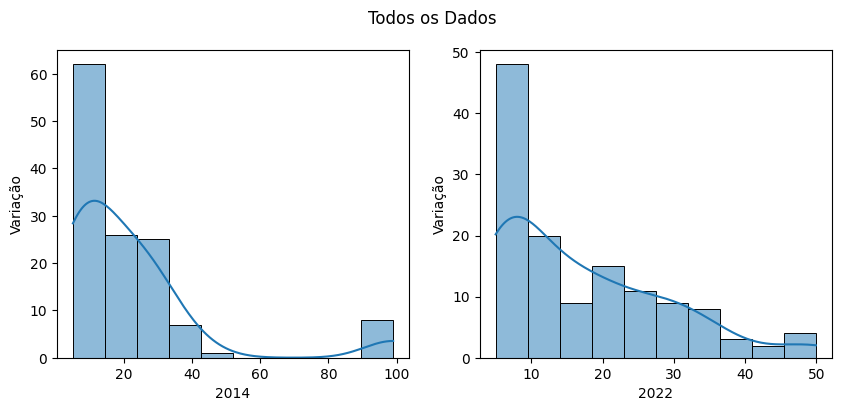

In [254]:
fig, axes =  plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('2014 e 2022')


sns.histplot(ax=axes[0],
            data=dados['2014'],  
            kde=True,
            bins=10,
            linewidth=0.7,
            )

sns.histplot(ax=axes[1],
            data=dados['2022'],
            kde=True,
            bins=10,
            linewidth=0.7,
            )


axes[0].set(xlabel='2014', ylabel='Variação')
axes[1].set(xlabel='2022', ylabel='Variação')

[Text(0.5, 0, 'Percent change'), Text(0, 0.5, 'Variação')]

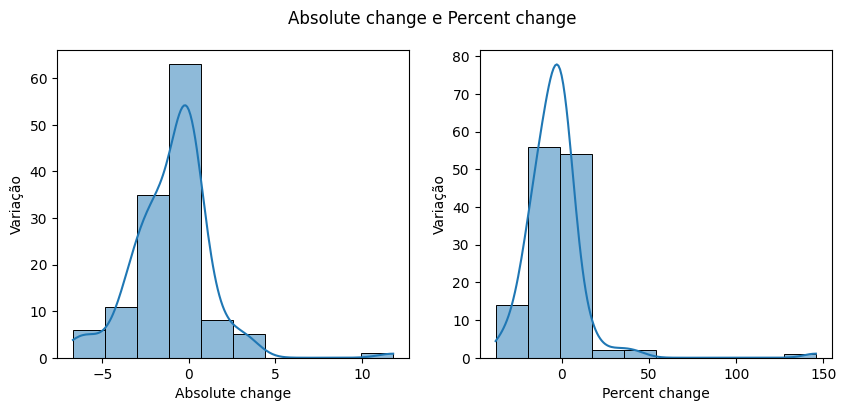

In [258]:
fig, axes =  plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Absolute change e Percent change')


sns.histplot(ax=axes[0],
            data=dados['Absolute change'],  
            kde=True,
            bins=10,
            linewidth=0.7,
            )

sns.histplot(ax=axes[1],
            data=dados['Percent change'],
            kde=True,
            bins=10,
            linewidth=0.7,
            )


axes[0].set(xlabel='Absolute change', ylabel='Variação')
axes[1].set(xlabel='Percent change', ylabel='Variação')

<Axes: xlabel='Absolute change', ylabel='Rank in 2022'>

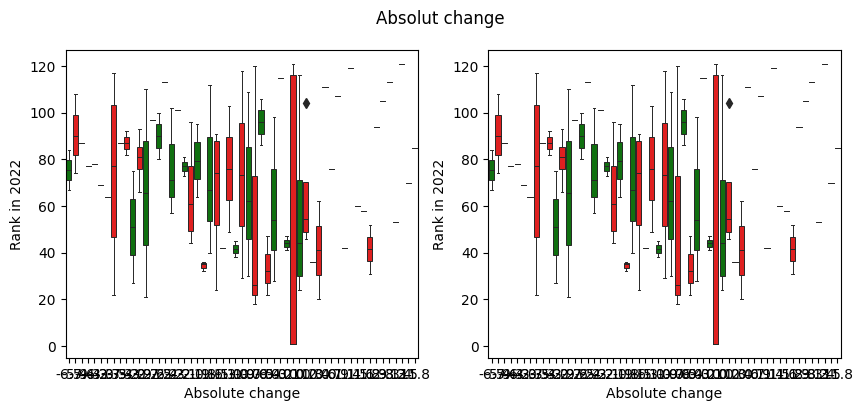

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Absolut change')

sns.boxplot(x="Absolute change", y="Rank in 2022",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[0],
            data=dados
           )

sns.boxplot(x="Absolute change", y="Rank in 2022",
            palette=["g", "r"],
            linewidth=0.7,
            ax=axes[1],
            data=dados
           )

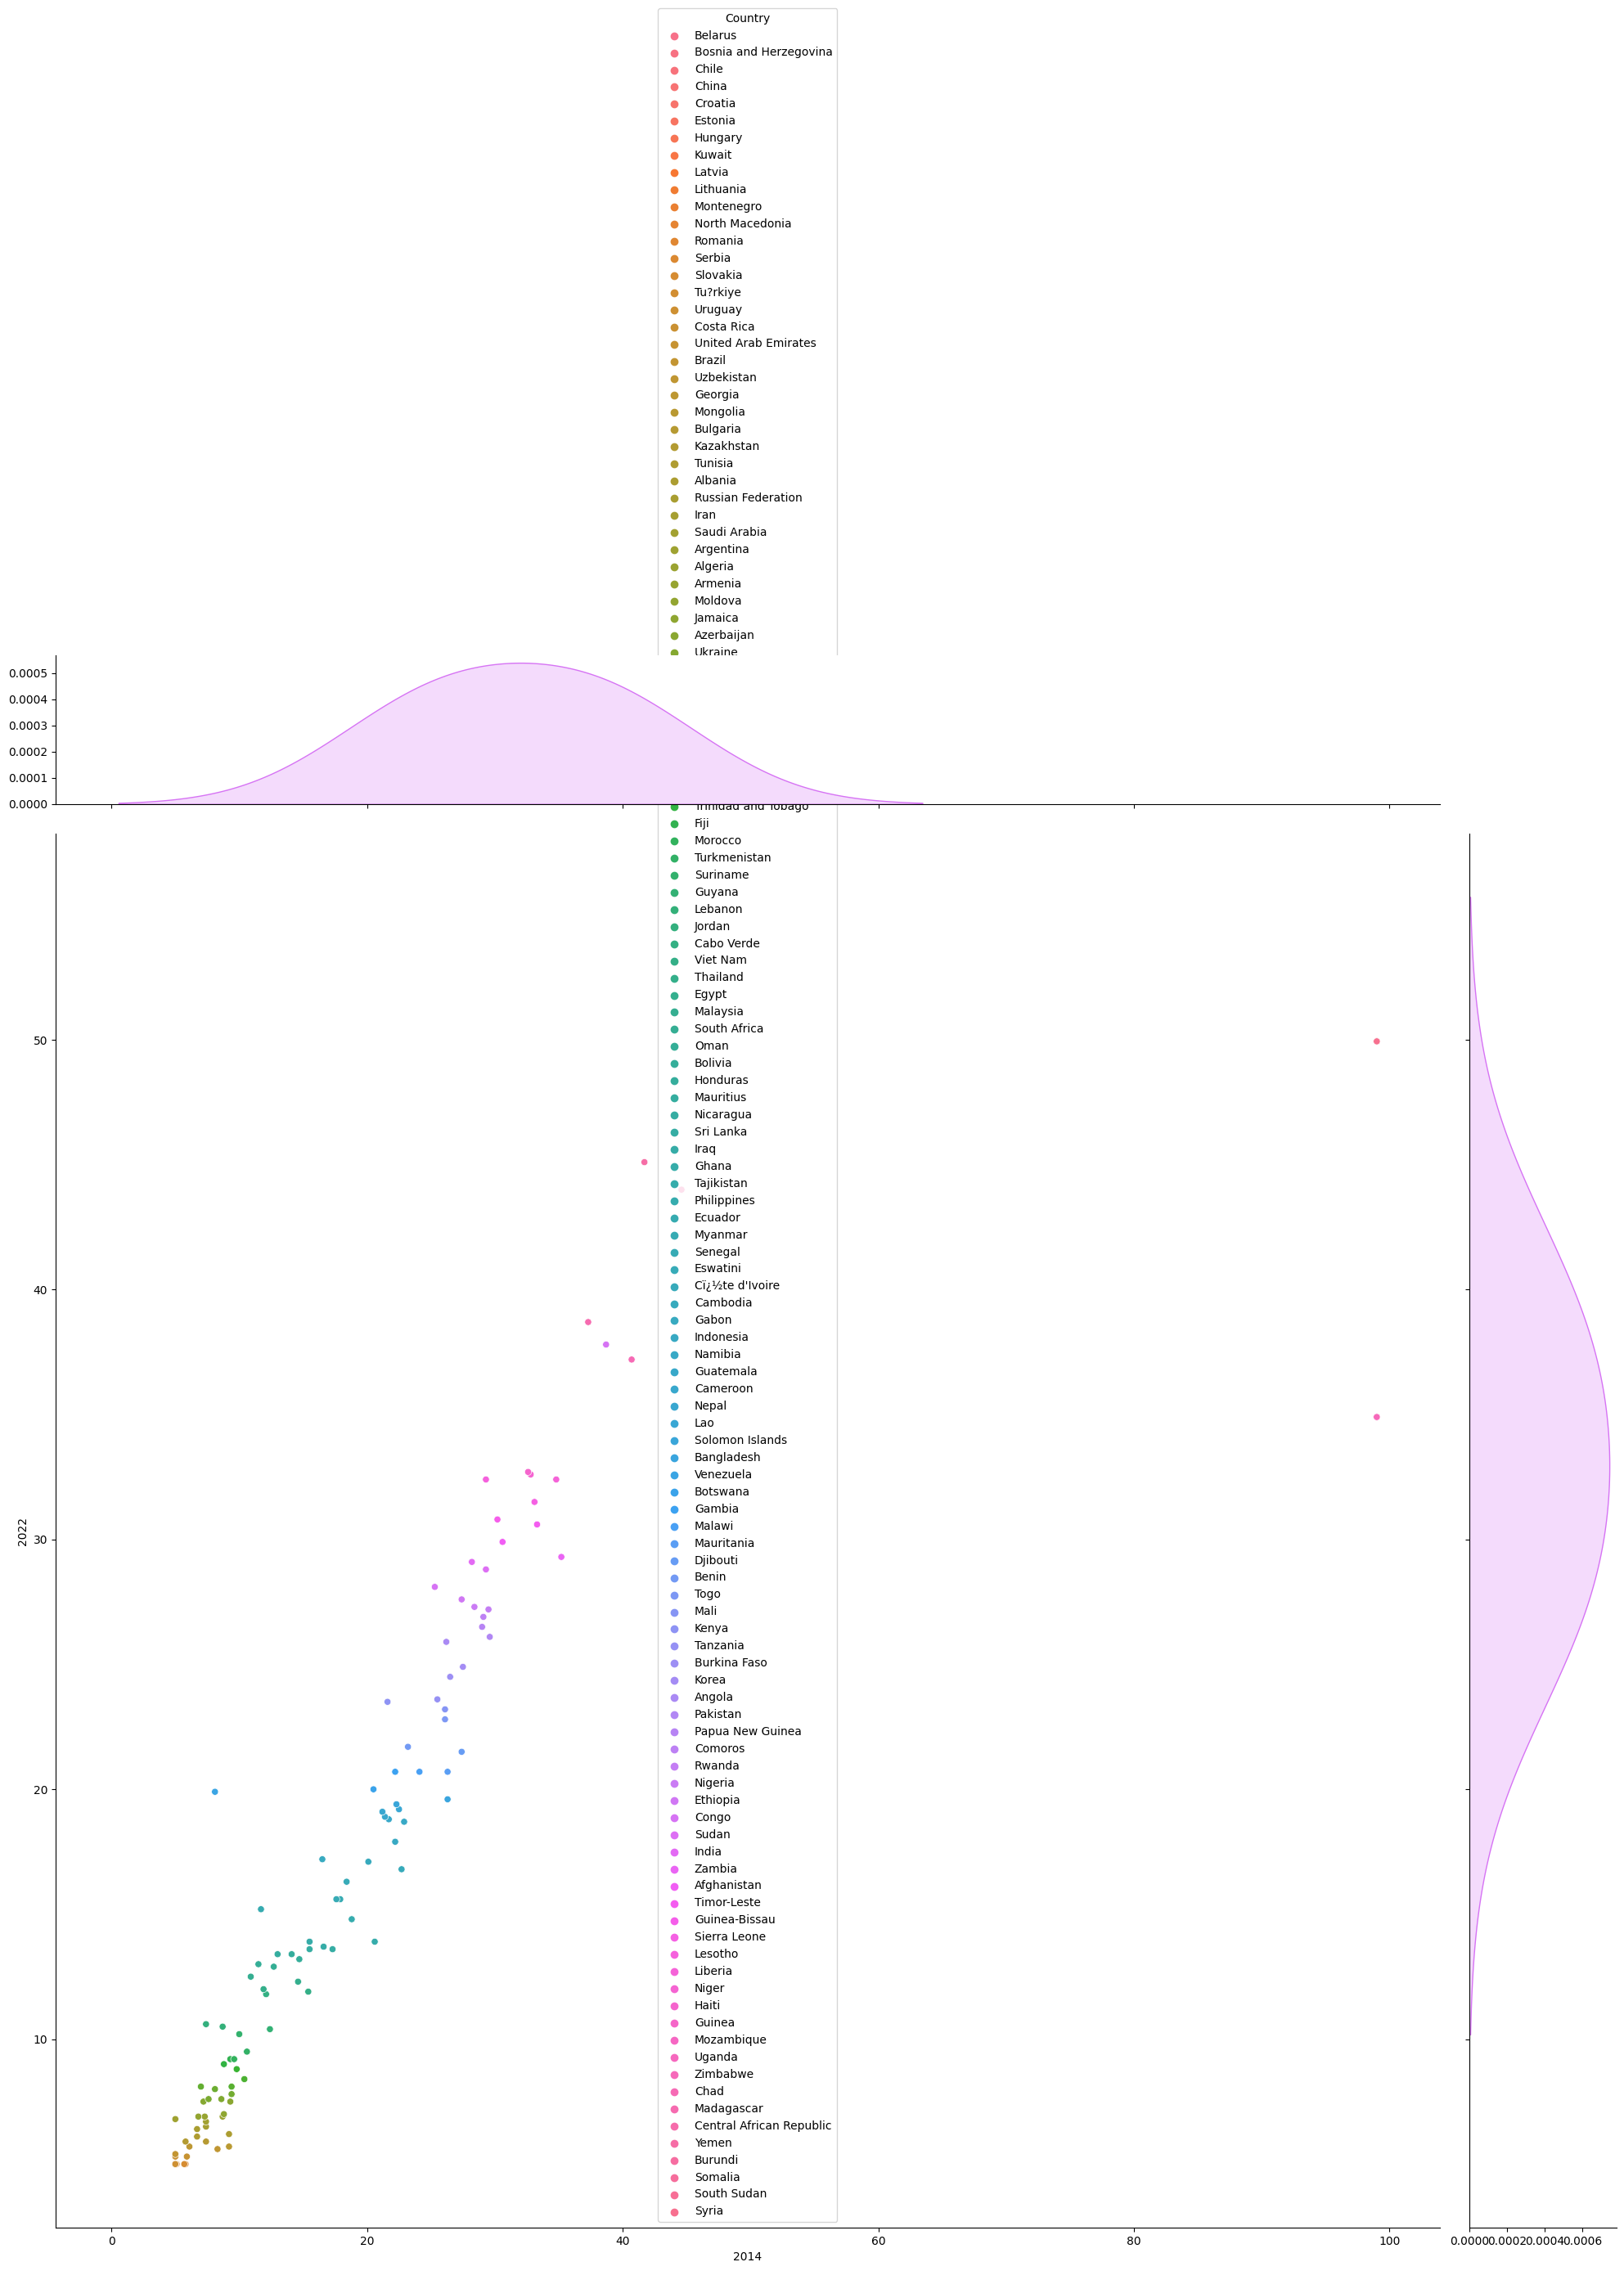

In [240]:
sns.jointplot(data=dados,
              x="2014", y="2022",
              height=20, 
              ratio=8,
              marginal_ticks=True,
              hue = 'Country'
             )